# Data Science Assignment
## Scenerio:
Let's imagine I'm owning a supermarket mall and through membership cards, I have some basic data about my customers like Customer ID, age, gender, annual income and spending score, which is something I assign to the customer based on my defined parameters like customer behavior and purchasing data.

This Mall_Customer dataset that has been provided to me is composed by the following five features:

▪ CustomerID: Unique ID assigned to the customer

▪ Gender: Gender of the customer

▪ Age: Age of the customer

▪ Annual Income (k$): Annual Income of the customer

▪ Spending Score (1-100): Score assigned by the mall based on customer behavior and spending nature.

In this particular dataset we have 200 samples to study.

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage

## Reading file and displaying data 

In [2]:
data = pd.read_csv("Mall_Customers.csv")
print(data.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


## Data Preprocessing and Visualization

In [3]:
# Checking missing values
data.isnull().sum() 

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

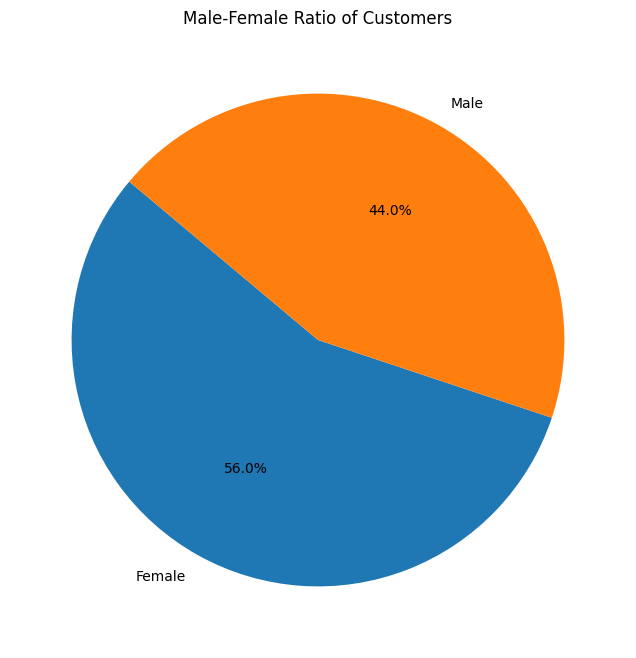

In [4]:
genre_counts = data['Genre'].value_counts()

# Visualization
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Male-Female Ratio of Customers')
plt.show()

In [5]:
# Label Encoding of categorical data
print(data['Genre'].unique())

label_encoder = preprocessing.LabelEncoder() 

data['Genre'] = label_encoder.fit_transform(data['Genre'])
data.head()

['Male' 'Female']


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


For clustering we need to consider the numerical features of the dataset. However, we will mainly focus on the Annual Income (k$) and Spending Score (1-100) features. For Kmeans we will consider the Age feature also.

In [6]:
# Feature Selection
main_clustering_features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

main_clustering_features.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Scaling of the values are necessary for hierarchical clustering as it deals with distance (normally euclidean)

In [7]:
# Scaling the values
scaler = StandardScaler()
scaled_df = scaler.fit_transform(main_clustering_features)

Visualizing the relationship of the features

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

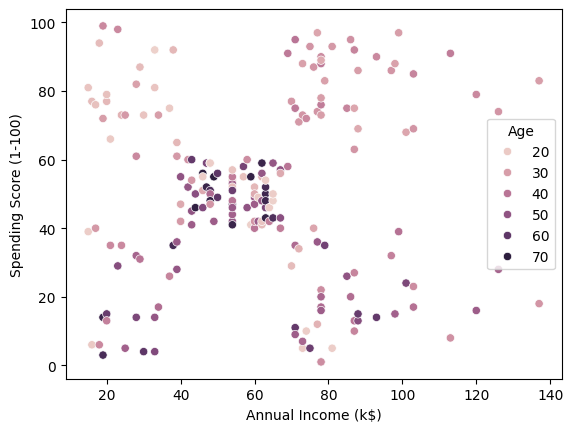

In [8]:
sns.scatterplot(data = data, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Age')

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

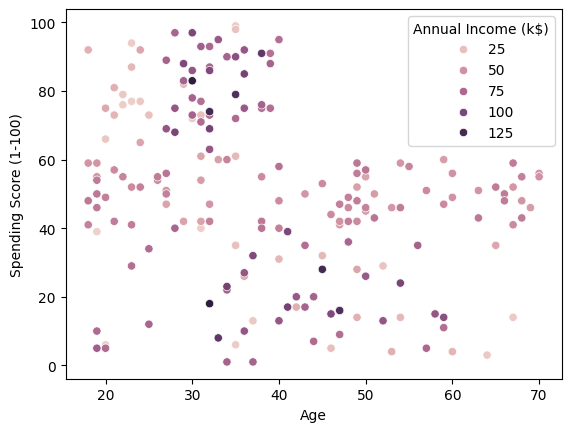

In [9]:
sns.scatterplot(data = data, x = 'Age', y = 'Spending Score (1-100)', hue = 'Annual Income (k$)')

Outliers can affect hierarchical clustering, that is why, we need to use the bxplot to check outliers of data.

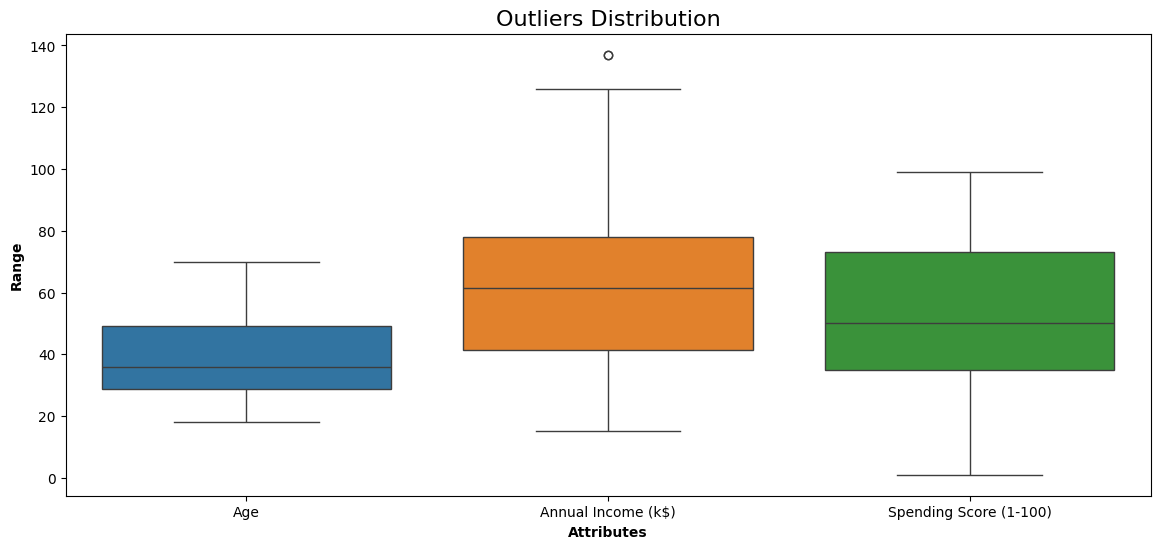

In [10]:
# Checking Outliers
def show_boxplot(df):
    plt.rcParams['figure.figsize'] = [14,6]
    sns.boxplot(data = df, orient="v")
    plt.title("Outliers Distribution", fontsize = 16)
    plt.ylabel("Range", fontweight = 'bold')
    plt.xlabel("Attributes", fontweight = 'bold')
    plt.show()
   
show_boxplot(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

## Part A: K-means Clustering
In this part, I will be utilizing K-means clustering algorithm to identify the appropriate number of clusters. My K-mean clustering algorithm should look for appropriate values of K at least in the range of 0 to 15 and show their corresponding sum-of-squared errors (SSE).

## Applying the Algorithm 

SSE values for each K:
K = 1: SSE = 269981.28
K = 2: SSE = 185917.14253928524
K = 3: SSE = 106348.37306211119
K = 4: SSE = 73679.78903948834
K = 5: SSE = 44448.45544793371
K = 6: SSE = 38858.9599751439
K = 7: SSE = 31969.426550235476
K = 8: SSE = 29858.483597603947
K = 9: SSE = 22209.851608025543
K = 10: SSE = 20786.93669205916
K = 11: SSE = 18612.222868009685
K = 12: SSE = 17083.67250170932
K = 13: SSE = 16511.947370563896
K = 14: SSE = 15599.148331445118
K = 15: SSE = 14697.298899626938


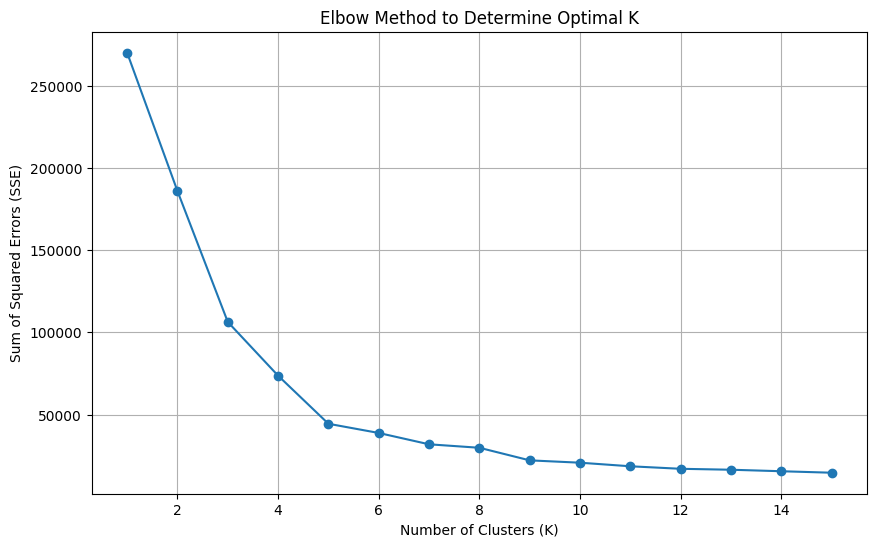

In [11]:
sse = []

for k in range(1, 16):
    kmeanModel = KMeans(n_clusters = k, init = 'k-means++', random_state = 0, n_init=1).fit(main_clustering_features)
    sse.append(kmeanModel.inertia_)

# Print the SSE values
print("SSE values for each K:")
for i, error in enumerate(sse, start=1):
    print(f"K = {i}: SSE = {error}")
    
# Plotting the SSE for each K value
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), sse, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method to Determine Optimal K')
plt.grid(True)
plt.show()

So, according to elbow method, cluster number 5 will be the optimal number for KMeans clustering. After that, the inertia is decreasing.

In [12]:
cluster_kmeans = KMeans(n_clusters=5, init = 'k-means++', random_state = 0, n_init=1).fit(main_clustering_features)

data['KMeanslabel'] = cluster_kmeans.labels_

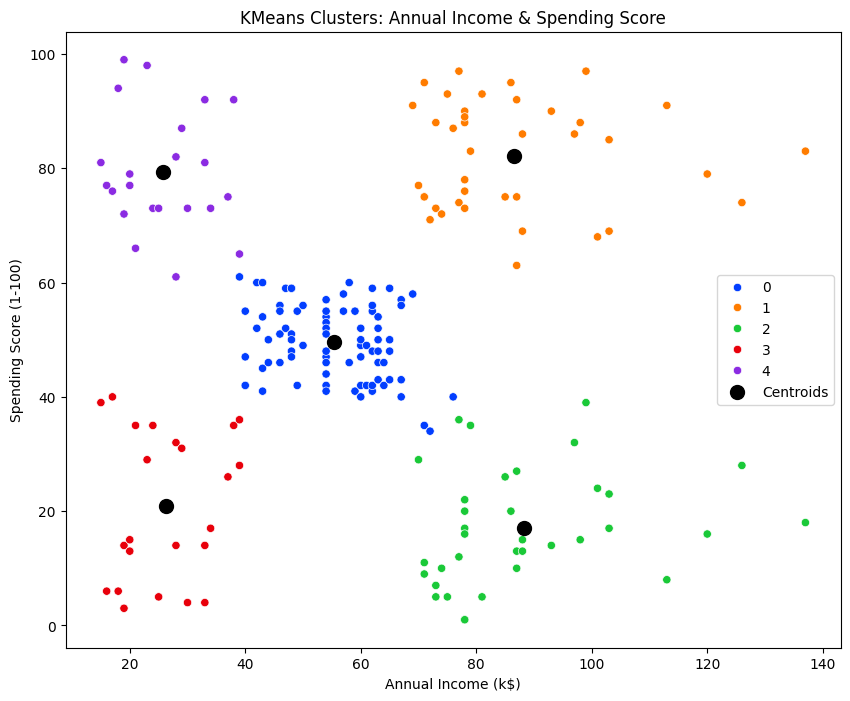

In [13]:
fig, ax = plt.subplots(figsize=(10,8))

sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeanslabel', palette='bright', ax=ax)
ax.set_title("KMeans Clusters: Annual Income & Spending Score")
ax.scatter(cluster_kmeans.cluster_centers_[:, 0], cluster_kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
ax.legend(loc='best')

plt.show()

## PART (B) [10 points]
Hierarchical Clustering: In this part, I will apply hierarchical clustering algorithm (agglomerative) to the provided mall dataset. 

## Hierarchical Clustering 

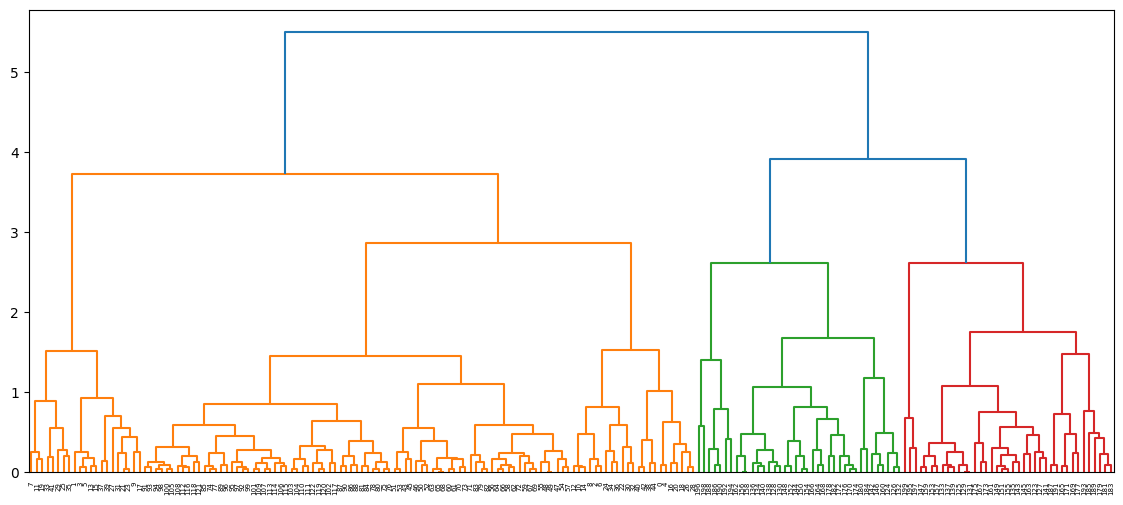

In [14]:
average_clustering = linkage(scaled_df, method="complete")
dendrogram(average_clustering)
plt.show()

From the dendogram, the optimal number of clusters will be 4

In [15]:
agc = AgglomerativeClustering(n_clusters = 4, metric = 'euclidean', linkage = 'complete').fit(scaled_df)
data['HClabel'] = agc.labels_

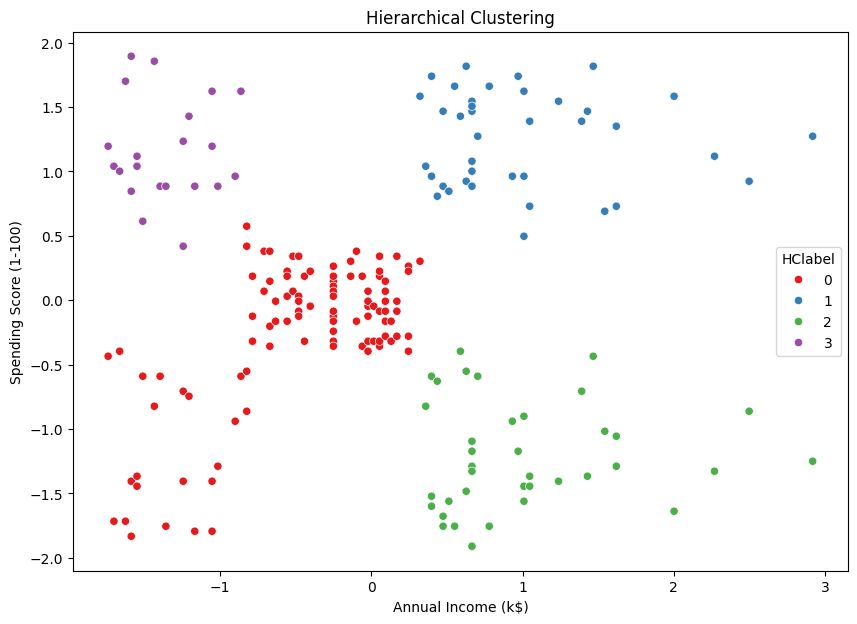

In [16]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=scaled_df[:, 0], y=scaled_df[:, 1], hue=data['HClabel'], palette=sns.color_palette("Set1", n_colors=len(np.unique(data['HClabel']))), legend='full')
plt.title('Hierarchical Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## PART (C) [10 points]
Density-based Clustering: In this part, I will apply density-based clustering algorithm to the provided dataset.

In [17]:
# Define the parameter grid
param_grid = ParameterGrid({
    'eps': np.linspace(1, 15, 15),
    'min_samples': range(4, 10)
})

# Find the best parameters
best_score = -1
best_params = None
for params in param_grid:
    dbscan = DBSCAN(**params)
    labels = dbscan.fit_predict(main_clustering_features)
    # Only compute the silhouette score for clusters greater than 1
    if len(np.unique(labels)) > 1:
        score = silhouette_score(main_clustering_features, labels)
        if score > best_score:
            best_score = score
            best_params = params

print('Best Parameters:', best_params)

Best Parameters: {'eps': 9.0, 'min_samples': 5}


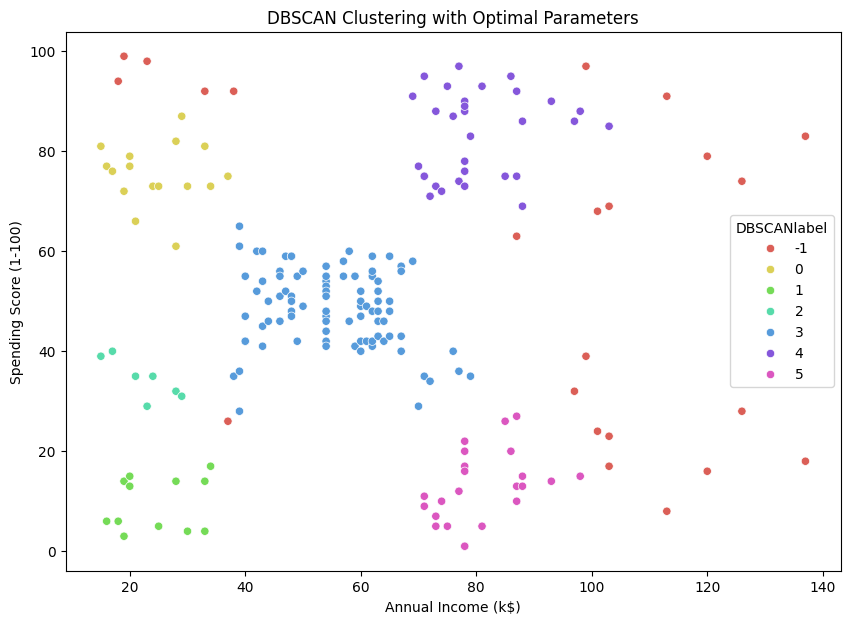

In [18]:
# Fitting DBSCAN to the dataset with optimal parameters
dbscan_optimal = DBSCAN(eps=9.0, min_samples=5).fit(main_clustering_features)

# Adding the cluster labels to the dataset
data['DBSCANlabel'] = dbscan_optimal.labels_

# Visualizing the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=main_clustering_features['Annual Income (k$)'], y=main_clustering_features['Spending Score (1-100)'], hue=data['DBSCANlabel'], palette=sns.color_palette("hls", n_colors=len(np.unique(data['DBSCANlabel']))), legend='full')
plt.title('DBSCAN Clustering with Optimal Parameters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [19]:
data.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),KMeanslabel,HClabel,DBSCANlabel
0,1,1,19,15,39,3,0,2
1,2,1,21,15,81,4,3,0
2,3,0,20,16,6,3,0,1
3,4,0,23,16,77,4,3,0
4,5,0,31,17,40,3,0,2
5,6,0,22,17,76,4,3,0
6,7,0,35,18,6,3,0,1
7,8,0,23,18,94,4,3,-1
8,9,1,64,19,3,3,0,1
9,10,0,30,19,72,4,3,0
